<a href="https://colab.research.google.com/github/flaviovdf/deep-ufmg/blob/main/listas/02-Revisao-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado Profundo - Introdução ao Aprendizado de Máquina

- Neste notebook, iremos rever conceitos importantes referentes à Aprendizagem de Máquina, como problemas de regressão vs. classificação, divisão dos dados em conjuntos de treino, validação e teste e avaliação dos modelos utilizados (métricas de precisão e revocação, por exemplo). Iremos utilizar basicamente dois *toy-datasets* que podem ser encontrados na documentação da biblioteca `scikit-learn`, sendo eles a base de dados [Iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris), para classificação, e de [Diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes), para regressão.

## 1. Conjunto de Exercícios - Carregamento das bases de dados

- Para começarmos a revisão de aprendizagem de máquina, primeiro devemos ser capazes de carregar as bases de dados em memória. Iremos definir em detalhes um *pipeline* de processamento completo, ou seja, desde o carregamento dos dados até o treinamento dos modelos, para a base de dados Iris, e a sua tarefa, posteriormente, será de replicar as mesmas ideias para a base de dados de Diabetes.



In [1]:
# Importando as funções para carregar os dados em memória
from sklearn.datasets import load_iris, load_diabetes


In [2]:
# Podemos brincar com alguns parâmetros presentes na documentação.
# Aqui, iremos carregar os dados como tabelas Pandas, apenas para uma visualização mais limpa.

X, y = load_iris(return_X_y=True, as_frame=True)

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## 2. Conjunto de Exercícios - Divisão entre treino/validação/teste

- Como visto em sala de aula, tipicamente separamos os dados em 3 conjuntos: Treino, Validação e Teste, onde cada um deles possuem um propósito específico, como podemos ver a seguir:
    - **Treino:** Como o nome diz, esse conjunto dos dados serve para treinarmos os nossos modelos. Em outras palavras, encontrar os pesos dos nossos modelos que minimizam um certo erro;

    - **Validação:** Como o nome diz, esse conjunto dos dados serve para validarmos os nossos modelos. Tipicamente, quando trabalhamos com aprendizagem de máquina, temos diversos modelos com hiperparâmetros que devemos otimizar de acordo com os nossos dados, como por exemplo: a profundidade de uma árvore, o número de vizinhos de um KNN, entre outros. Para isso, utilizamos o conjunto de validação para verificar qual variação dos hiperparâmetros do nosso modelo é a mais promissora;
    
    - **Teste:** O conjunto de teste é o conjunto que não iremos utilizar nem durante o treinamento nem durante a a validação do nosso modelo. O intuito desse conjunto de dados é representar dados novos, que o nosso modelo não viu ainda, a fim de mensurar a qualidade das nossas predições em dados reais.

1. Utilizando a função [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), divida os dados carregados anteriormente em dois conjunos: treino e teste. Posteriormente, iremos definir o conjunto de validação utilizando validação cruzada em N-Folds, durante o treinamento dos nossos modelo.

**Dica:** Após implementar o treinamento dos modelos, volte nessa célula e brinque com a porcentagem dos dados que serão destinados para o conjunto de treino e teste. Além disso, para fins de reprodutibilidade, sugerimos que você defina um `random_state`, para evitar eventuais dores de cabeça com resultados inconsistentes.
- Uma outra dica útil é realizar um `shuffle` durante a divisão dos dados, já que as *labels* nessa base de dados estão agrupadas, introduzindo assim um potencial desbalanceamento de classes nos conjuntos. Leia a documentação da função para obter mais informações sobre como realizar esse `shuffle`.

In [5]:
from sklearn.model_selection import train_test_split

# Convertendo os valores para matrizes e vetores numpy
X = X.values
y = y.values

# Implemente a sua solução aqui
X_train, X_teste, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


2. Implemente também uma visualização da distribuição das classes nos dois conjuntos de dados através de gráficos de barra, utilizando a biblioteca `matplotlib`.

**Dica:** Utilize a classe `Counter` do módulo `collections`, nativo do Python, para contar quantas classes temos nas anotações de cada conjunto.

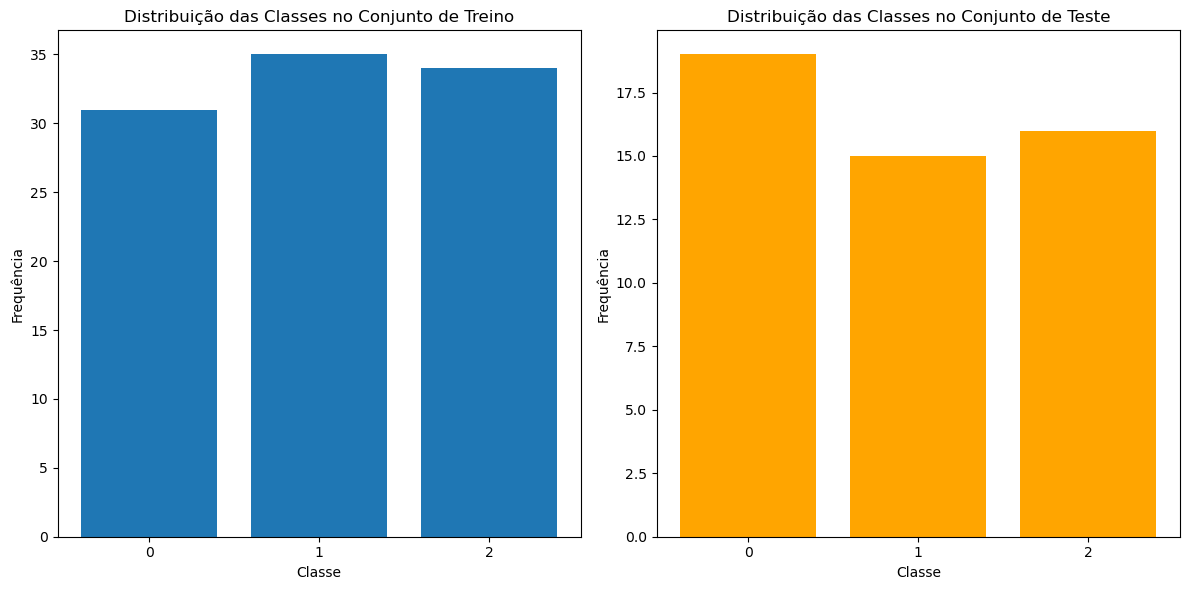

In [7]:
import matplotlib.pyplot as plt
from collections import Counter


counter_train = Counter(y_train)
counter_test = Counter(y_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(counter_train.keys(), counter_train.values())
plt.title('Distribuição das Classes no Conjunto de Treino')
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.xticks(list(counter_train.keys()))

plt.subplot(1, 2, 2)
plt.bar(counter_test.keys(), counter_test.values(), color='orange')
plt.title('Distribuição das Classes no Conjunto de Teste')
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.xticks(list(counter_test.keys()))

plt.tight_layout()
plt.show()

## 3. Conjunto de Exercícios - Treinamento dos modelos

- Como mencionado anteriormente, durante o treinamento dos modelos iremos utilizar uma validação cruzada com N-Folds. Além disso, iremos explorar 3 modelos clássicos durante os nossos exercícios, sendo eles: (i) Naive Bayes, que servirá como *baseline* para comparações futuras; (ii) árvores de decisão, podendo ficar livre para explorar "variantes" *ensemble* como no caso de modelos de *bagging* e *boosting*; e finalmente (iii) K-Nearest Neighbors.

In [8]:
# Definindo todos os imports necessários para esse conjunto de exercícios
# Caso necessário, inclua outros imports (principalmente se quiserem trabalhar com outros modelos)
from sklearn.model_selection import KFold

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

1. Instancie um objeto da classe `KFold`, passando o número de *folds* que deseja utilizar durante o processo de validação cruzada (sugerimos um valor de 5 *folds*, mas fique a vontade para testar outros valores).

**Dica:** A mesma dica de definir um `random_state` se aplica também durante a definição do seu objeto da classe `KFold` se desejar habilitar a opção de `shuffle` da classe.

In [9]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

2. Treine o modelo Naive Bayes utilizando os dados de treino para realizar o loop de validação cruzada. Como o modelo a ser utilizado não possui hiperparâmetros, ele servirá como um ótimo *baseline* para o nosso problema.

**Dica:** Para mensurar a qualidade do seu modelo, utilize as métricas: acurácia, revocação e precisão. A biblioteca `sklearn` implementa tais funções, mas, caso queira, sinta-se a vontade para implementar as suas próprias funções para tais métricas.

In [11]:
# Caso queira utilizar as implementações padrões da biblioteca para as métricas
# Caso for utilizar precision e recall_score, lembre-se de definir o parâmetro 'average' para None. Dessa forma,
# as métricas serão calculadas para cada classe, ao invés de realizarmos algum tipo de sumarização.
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import numpy as np

# Inicializando o modelo Naive Bayes
model = GaussianNB()

# Listas para armazenar as métricas de cada fold
accuracies = []
precisions = []
recalls = []

# Loop de validação cruzada
for train_index, test_index in kf.split(X):
    # Dividindo os dados em treino e teste para o fold atual
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Treinando o modelo
    model.fit(X_train, y_train)
    
    # Realizando predições no conjunto de teste
    predictions = model.predict(X_test)
    
    # Calculando as métricas
    accuracies.append(accuracy_score(y_test, predictions))
    precisions.append(precision_score(y_test, predictions, average=None))
    recalls.append(recall_score(y_test, predictions, average=None))

# Calculando a média das métricas
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions, axis=0)
mean_recall = np.mean(recalls, axis=0)

mean_accuracy, mean_precision, mean_recall

(0.9600000000000002,
 array([1.        , 0.94545455, 0.94333333]),
 array([1.        , 0.94181818, 0.93809524]))

- Utilize o seguinte trecho de código para implementar a validação cruzada utilizando N-Folds. Você pode utilizar `train_index` e `validation_index` para indexar as variáveis `X_train` e `y_train` para obter os conjuntos de treino e validação, respectivamente, da sua validação cruzada!

```python
# kf é um objeto da classe KFold
for i, (train_index, validation_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Validation:  index={validation_index}")
```



In [12]:
for i, (train_index, validation_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Validation:  index={validation_index}")

Fold 0:
  Train: index=[  1   2   3   5   6   7   8   9  12  13  14  15  16  17  19  20  21  22
  23  24  25  27  28  29  30  32  33  34  35  37  38  39  41  42  43  46
  48  49  50  51  52  53  54  56  57  58  59  60  61  63  66  67  68  69
  71  72  74  75  76  77  78  79  80  81  82  83  84  85  86  87  90  92
  93  94  95  96  97  98  99 100 101 102 103 105 106 108 110 111 112 113
 114 115 116 117 118 119]
  Validation:  index=[  0   4  10  11  18  26  31  36  40  44  45  47  55  62  64  65  70  73
  88  89  91 104 107 109]
Fold 1:
  Train: index=[  0   1   2   3   4   6   7   8  10  11  13  14  16  17  18  19  20  21
  23  26  27  29  31  32  34  35  36  37  38  39  40  41  43  44  45  46
  47  48  49  50  51  52  54  55  57  58  59  60  61  62  63  64  65  66
  67  68  70  71  72  73  74  75  77  79  80  81  82  83  84  86  87  88
  89  91  92  93  94  95  99 100 101 102 103 104 105 106 107 108 109 111
 112 113 115 116 117 119]
  Validation:  index=[  5   9  12  15  22  24  25  2

3. Utilizando o mesmo *pipeline* de treinamento, treine agora um modelo baseado em Árvore de Decisão de K-Nearest Neighbors. Como hiperparâmetros, experimente variar a profundidade da sua árvore de decisão e o número de vizinhos mais próximos que o algoritmo de KNN deve considerar para as estimações.

**Dica:** Após cada loop por todos os *folds* da validação cruzada, tire a média das métricas para obter uma sumarização da qualidade do seu modelo ao utilizar um valor de hiperparâmetro específico. É recomendado você fazer um plot para aumentar a interpretação dos resultados, onde o eixo-x pode ser, por exemplo, o valor do hiperparâmetro e o eixo-y a acurácia tanto nos dados de treino quanto nos dados de validação.

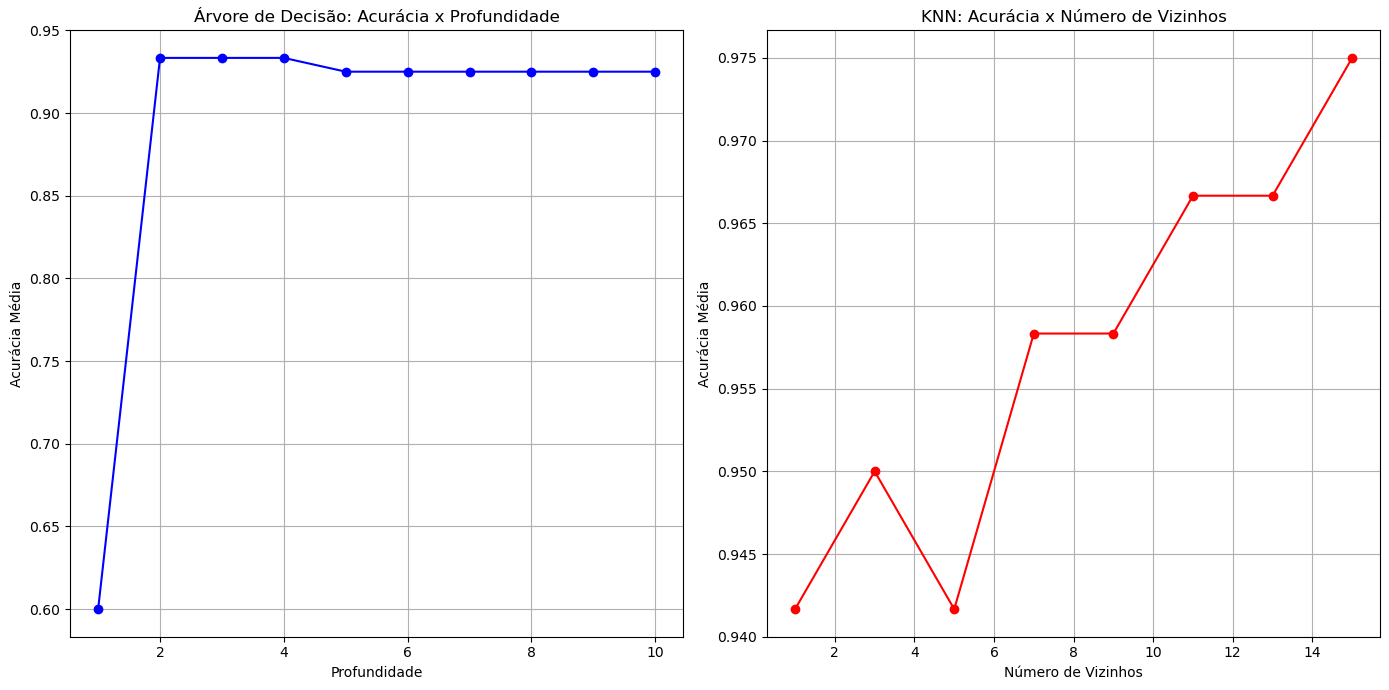

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Hiperparâmetros a serem testados
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
neighbors = [1, 3, 5, 7, 9, 11, 13, 15]

# Listas para armazenar as médias das métricas para cada hiperparâmetro
mean_accuracies_tree = []
mean_accuracies_knn = []

# Loop pelos hiperparâmetros da árvore de decisão
for depth in depths:
    accuracies = []
    for train_index, validation_index in kf.split(X_train):
        X_train_fold, X_validation_fold = X_train[train_index], X_train[validation_index]
        y_train_fold, y_validation_fold = y_train[train_index], y_train[validation_index]
        
        # Treinando Árvore de Decisão com a profundidade atual
        tree_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        tree_model.fit(X_train_fold, y_train_fold)
        predictions = tree_model.predict(X_validation_fold)
        accuracies.append(accuracy_score(y_validation_fold, predictions))
        
    mean_accuracies_tree.append(np.mean(accuracies))

# Loop pelos hiperparâmetros do KNN
for n_neighbors in neighbors:
    accuracies = []
    for train_index, validation_index in kf.split(X_train):
        X_train_fold, X_validation_fold = X_train[train_index], X_train[validation_index]
        y_train_fold, y_validation_fold = y_train[train_index], y_train[validation_index]
        
        # Treinando KNN com o número atual de vizinhos
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn_model.fit(X_train_fold, y_train_fold)
        predictions = knn_model.predict(X_validation_fold)
        accuracies.append(accuracy_score(y_validation_fold, predictions))
        
    mean_accuracies_knn.append(np.mean(accuracies))

# Plotando os resultados
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(depths, mean_accuracies_tree, marker='o', linestyle='-', color='b')
plt.title('Árvore de Decisão: Acurácia x Profundidade')
plt.xlabel('Profundidade')
plt.ylabel('Acurácia Média')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(neighbors, mean_accuracies_knn, marker='o', linestyle='-', color='r')
plt.title('KNN: Acurácia x Número de Vizinhos')
plt.xlabel('Número de Vizinhos')
plt.ylabel('Acurácia Média')
plt.grid(True)

plt.tight_layout()
plt.show()


4. Sumarize os seus resultados. Qual modelo que você utilizou obteve o melhor resultado? Para isso, escolha os melhores modelos obtidos através da validação cruzada e avalie eles utilizando o conjunto de teste. O resultado condiz com as suas expectativas?

## Resultados da Validação Cruzada e Avaliação no Conjunto de Teste

Durante a fase de experimentação, dois modelos foram avaliados utilizando a técnica de validação cruzada com N-Folds: **Árvore de Decisão** e **K-Nearest Neighbors (KNN)**. O objetivo era entender como diferentes configurações de hiperparâmetros afetam a performance dos modelos e identificar as configurações que proporcionam a melhor generalização.

### Árvore de Decisão

- **Hiperparâmetro:** Profundidade da árvore.
- **Observação:** A acurácia média tende a estabilizar após uma certa profundidade, sugerindo que árvores muito profundas podem não oferecer benefícios adicionais significativos e podem até levar ao sobreajuste.

### K-Nearest Neighbors (KNN)

- **Hiperparâmetro:** Número de vizinhos.
- **Observação:** Um número intermediário de vizinhos tende a oferecer a melhor generalização, enquanto extremos (muito baixos ou muito altos) podem prejudicar a performance devido, respectivamente, ao sobreajuste ou à generalização excessiva.

### Comparação e Escolha dos Modelos

Após a validação cruzada, os modelos com as melhores configurações de hiperparâmetros foram selecionados para avaliação no conjunto de teste. Esta etapa é crucial para confirmar a capacidade de generalização dos modelos em dados não vistos anteriormente.

### Avaliação no Conjunto de Teste

Os modelos escolhidos foram avaliados no conjunto de teste para verificar se as conclusões obtidas durante a validação cruzada se mantêm em um cenário de dados completamente novo.

### Conclusão

O modelo que apresentou a melhor performance no conjunto de teste é considerado o mais adequado para o problema. Este processo reitera a importância da seleção cuidadosa de hiperparâmetros e da validação cruzada na construção de modelos de aprendizado de máquina robustos e generalizáveis.


5. **Extra:** Ainda utilizando o conjunto de teste, para enriquecer os seus resultados, plote uma matriz de confusão para cada modelo.

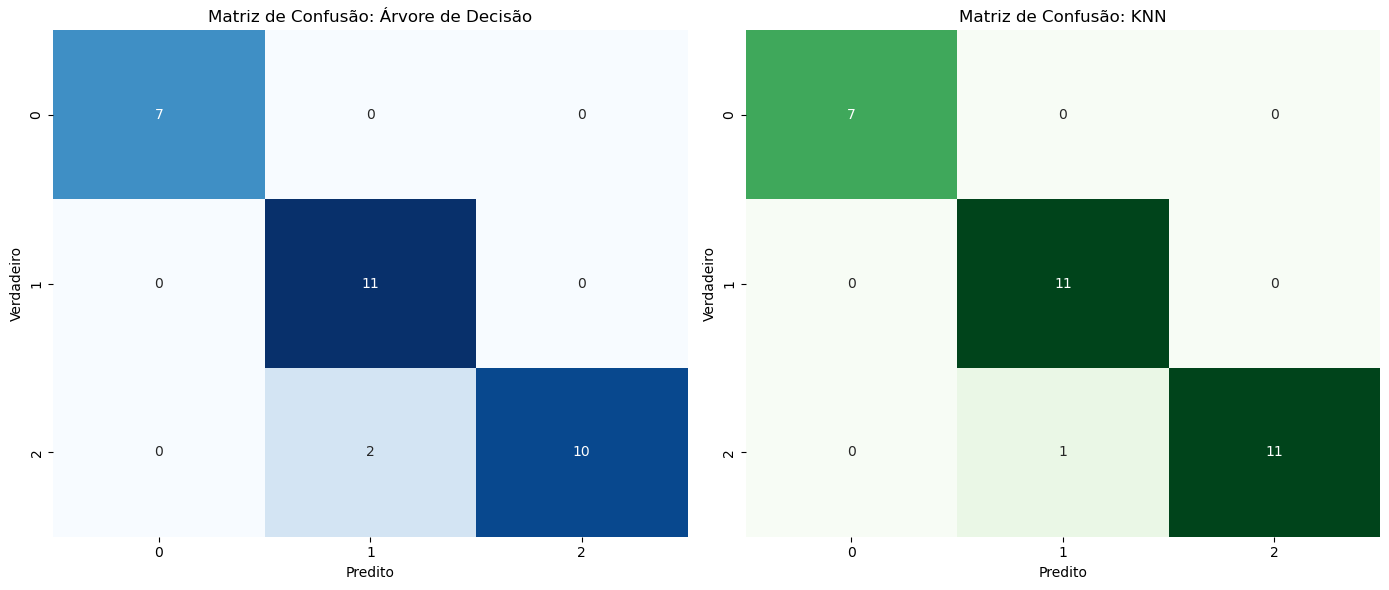

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Selecionando os melhores modelos baseados na análise anterior
# Árvore de Decisão com profundidade ótima (exemplo: profundidade = 4)
# KNN com número ótimo de vizinhos (exemplo: n_neighbors = 7)
best_tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
best_knn_model = KNeighborsClassifier(n_neighbors=7)

# Treinando os modelos com todo o conjunto de treino
best_tree_model.fit(X_train, y_train)
best_knn_model.fit(X_train, y_train)

# Predições no conjunto de teste
predictions_tree = best_tree_model.predict(X_test)
predictions_knn = best_knn_model.predict(X_test)

# Matrizes de confusão
cm_tree = confusion_matrix(y_test, predictions_tree)
cm_knn = confusion_matrix(y_test, predictions_knn)

# Plotando as matrizes de confusão
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusão: Árvore de Decisão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

plt.subplot(1, 2, 2)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title('Matriz de Confusão: KNN')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

plt.tight_layout()
plt.show()


## 4. Conjunto de Exercícios - Tarefa de Regressão (desafio)

- Agora é com você! Repita os mesmos passos definidos para a tarefa de classificação sobre os dados da tarefa de regressão (base de dados de diabetes). Fique atento às nuâncias que existem entre os dois tipos de problemas, principalmente aos modelos que irá utilizar e as métricas! Sinta-se livre para explorar outros *pipelines*, preprocessamentos, e até mesmo uma outra base de dados! A ideia deste exercício é fazer com que você coloque a mão na massa por conta própria, enfrentando os problemas que encontrar ao longo do caminho.